In [36]:
# get all the csvs that end with _deployments.csv in this directory
import glob
csvs = glob.glob('./*/[a-z]*_deployments.csv')
csvs

['./snapshot/snapshot_deployments.csv',
 './aragon/aragon_deployments.csv',
 './daostack/daostack_deployments.csv',
 './realms/realm_deployments.csv',
 './tally/tally_deployments.csv',
 './daohaus/dao_deployments.csv']

In [37]:
# concat into one dataframe
import pandas as pd
df = pd.concat([pd.read_csv(csv) for csv in csvs])
# reindex
df = df.reset_index(drop=True)
df

,platform,platform_id,name,additional,website
0,snapshot,groomi.eth,Art,seeuart,https://snapshot.org/#/groomi.eth
1,snapshot,3.onara.eth,Office,NaN,https://snapshot.org/#/3.onara.eth
2,snapshot,lowadka.eth,lowadka,https://t.me/pathdegen,https://snapshot.org/#/lowadka.eth
3,snapshot,geekgeek.eth,BAKC,NaN,https://snapshot.org/#/geekgeek.eth
4,snapshot,aetdevinz.eth,devinz,HDevinz,https://snapshot.org/#/aetdevinz.eth
...,...,...,...,...,...
22977,daohaus,0xff07943f171b826b3618982a6213f157fbc5e226,NaN,network: xdai version: 2.1,NaN
22978,daohaus,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,network: xdai version: 2.1,NaN
22979,daohaus,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,PRIDEdao,network: xdai version: 2.1,NaN
22980,daohaus,0xffb676765d521518ac5c0d4f4067a9db9b72901b,EmpanaDAO,network: xdai version: 2.0,NaN


In [49]:
# save to csv
df.to_csv('all_deployments.csv', index=False)

In [51]:
# what pct have names?
df[df['name'].notnull()].shape[0] / df.shape[0]

0.8634583587155165

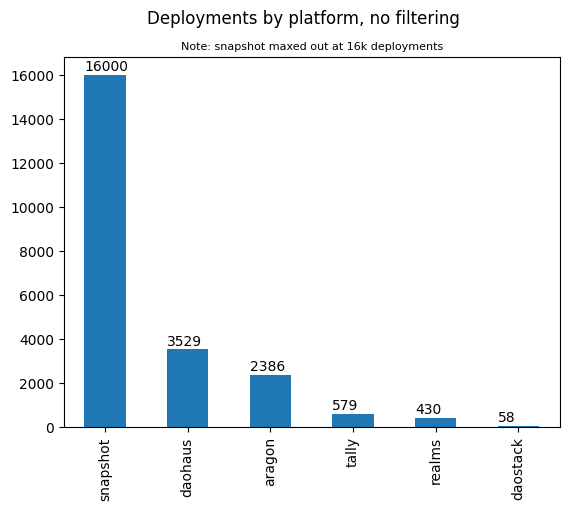

In [48]:
# platform vlaue counts annotated with count
import matplotlib.pyplot as plt
df['platform'].value_counts().plot(kind='bar')
# annotate
for i, v in enumerate(df['platform'].value_counts()):
    plt.text(i - .25, v + 200, str(v))
# title
plt.suptitle('Deployments by platform, no filtering')
plt.title('Note: snapshot maxed out at 16k deployments', fontsize=8)
plt.show()